In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)
print(train_labels)

3
(60000, 28, 28)
uint8
[5 0 4 ..., 5 6 8]


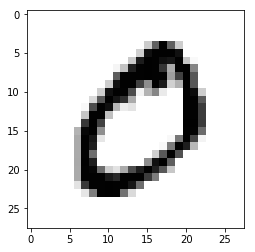

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)

In [5]:
from keras import layers,models

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [6]:
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [7]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

In [8]:
from keras.utils import to_categorical

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels, epochs=50, batch_size=128)

Epoch 1/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2511 - acc: 0.9280
Epoch 2/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1022 - acc: 0.9693
Epoch 3/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0675 - acc: 0.9799
Epoch 4/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0490 - acc: 0.9854
Epoch 5/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.0370 - acc: 0.9890
Epoch 6/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.0276 - acc: 0.9914
Epoch 7/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.0221 - acc: 0.9933
Epoch 8/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.0167 - acc: 0.9952
Epoch 9/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.0132 - acc: 0.9961
Epoch 10/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.0104 - a

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test acc: {}".format(test_acc))

10000/10000 [==============================] - 1s 66us/step
test acc: 0.9848
